In [5]:
# Import libraries
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [6]:
# Download dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

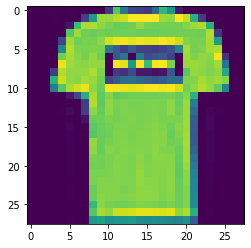

In [7]:
plt.imshow(train_images[1])
plt.show()

In [8]:
train_images[1].shape

(28, 28)

In [9]:
# Normalize the images
train_images = (train_images / 128) - 1
test_images = (test_images / 128) - 1

In [10]:
# Flatten the images
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [11]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [12]:
# Assembling the network by layers
model = Sequential(layers=[Dense(128, activation='sigmoid', input_shape=(784,)),
                           Dense(64, activation='tanh'),
                           Dense(32, activation='tanh'),
                           Dense(10, activation='softmax'),
                          ],
                   name='neural_net_modal',
                  )

In [13]:
model.summary()

Model: "neural_net_modal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.get_config()

{'name': 'neural_net_modal',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 128,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    

In [15]:
# Compile a network with 
model.compile(
    optimizer='adam', # an optimizer, 
    loss=keras.losses.CategoricalCrossentropy(), # a loss function
    metrics=['accuracy'], # and a metric
) 

In [16]:
# Turning output values into vectors
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [17]:
# Train the model
mf = model.fit(
    train_images[:,:],
    y_train[:,:],
    epochs=20,
    batch_size=1024,
    validation_split=0.25,
)

Epoch 1/20
44/44 [==============================] - 1s 13ms/step - loss: 1.1381 - accuracy: 0.6600 - val_loss: 0.7361 - val_accuracy: 0.7573
Epoch 2/20
44/44 [==============================] - 0s 10ms/step - loss: 0.6421 - accuracy: 0.7844 - val_loss: 0.5680 - val_accuracy: 0.8049
Epoch 3/20
44/44 [==============================] - 0s 10ms/step - loss: 0.5262 - accuracy: 0.8231 - val_loss: 0.4943 - val_accuracy: 0.8279
Epoch 4/20
44/44 [==============================] - 1s 12ms/step - loss: 0.4680 - accuracy: 0.8412 - val_loss: 0.4684 - val_accuracy: 0.8327
Epoch 5/20
44/44 [==============================] - 1s 12ms/step - loss: 0.4362 - accuracy: 0.8494 - val_loss: 0.4278 - val_accuracy: 0.8502
Epoch 6/20
44/44 [==============================] - 0s 11ms/step - loss: 0.4058 - accuracy: 0.8596 - val_loss: 0.4088 - val_accuracy: 0.8554
Epoch 7/20
44/44 [==============================] - 0s 10ms/step - loss: 0.3876 - accuracy: 0.8646 - val_loss: 0.4011 - val_accuracy: 0.8563
Epoch 8/20
44

In [18]:
# Evaluate the model
model.evaluate(
    test_images,
    y_test
)

313/313 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8705


[0.3623684346675873, 0.8705000281333923]

In [19]:
# Predict on the first 5 test images
y_pred = np.argmax(model.predict(test_images[:5]), axis=1)
y_pred

1/1 [==============================] - 0s 70ms/step


array([9, 2, 1, 1, 6], dtype=int64)

In [20]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [21]:
mf.history

{'loss': [1.1380611658096313,
  0.6420673727989197,
  0.526179313659668,
  0.4679746627807617,
  0.4361932873725891,
  0.40581220388412476,
  0.3876383602619171,
  0.37529000639915466,
  0.3626689612865448,
  0.34691905975341797,
  0.33708280324935913,
  0.3277248442173004,
  0.3174568712711334,
  0.31041836738586426,
  0.3028102219104767,
  0.297306627035141,
  0.28906095027923584,
  0.2803037464618683,
  0.27316078543663025,
  0.26903942227363586],
 'accuracy': [0.6599555611610413,
  0.7843999862670898,
  0.8231111168861389,
  0.8412222266197205,
  0.8493555784225464,
  0.8595777750015259,
  0.8645777702331543,
  0.8684666752815247,
  0.8724222183227539,
  0.8766888976097107,
  0.8811555504798889,
  0.882622241973877,
  0.8872222304344177,
  0.8899333477020264,
  0.8934444189071655,
  0.894266664981842,
  0.8969333171844482,
  0.9005777835845947,
  0.9036666750907898,
  0.9034000039100647],
 'val_loss': [0.7361434698104858,
  0.5680371522903442,
  0.49431362748146057,
  0.46844115853

<function matplotlib.pyplot.show(close=None, block=None)>

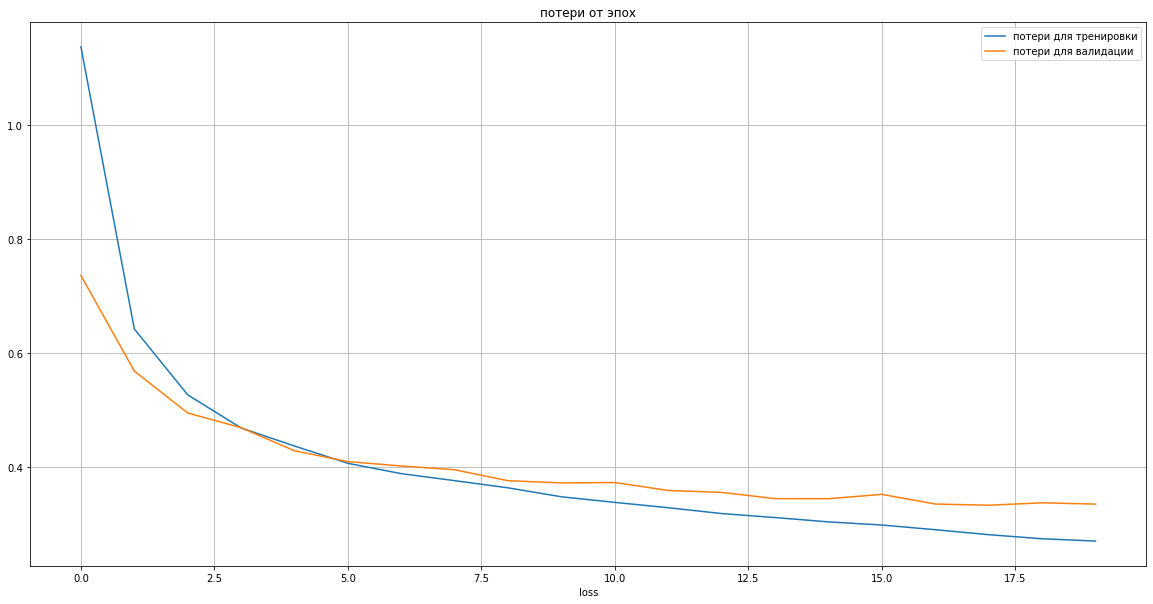

In [22]:
plt.figure(figsize=(20,10))
plt.plot(mf.history['loss'], label = 'потери для тренировки')
plt.plot(mf.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпоха')
plt.xlabel('loss')
plt.legend()
plt.grid()
plt.title('потери от эпох')
plt.show

In [23]:
# Assembling the network by layers
model = Sequential(layers=[Dense(256, activation='sigmoid', input_shape=(784,)),
                           Dense(128, activation='tanh'),
                           Dense(64, activation='tanh'),
                           Dense(10, activation='softmax'),
                          ],
                   name='neural_net_modal',
                  )

CPU times: total: 6min 43s
Wall time: 1min 36s


<function matplotlib.pyplot.show(close=None, block=None)>

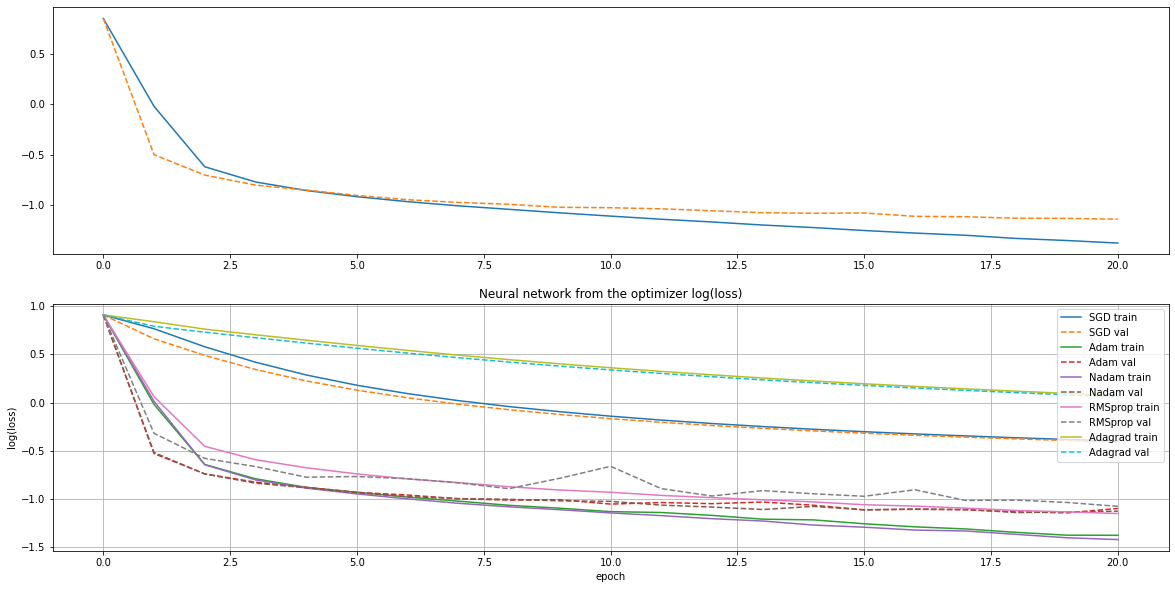

In [24]:
%%time

# Saving weights (this is the starting point)
model.save_weights('model.h5')

plt.figure(figsize=(20,10))

# Number of epochs
epochs = 20
# Vector for output of results
epoch = np.arange(epochs + 1)

model_3 = Sequential(layers=[Dense(256, activation='sigmoid', input_shape=(784,)),
                             Dense(64, activation='tanh'),
                             Dense(10, activation='softmax'),
                            ])

model_3.compile(
    optimizer='Nadam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Calculating the model loss without training
m3e_train = model_3.evaluate(train_images[:48000,:],  to_categorical(train_labels[:48000]), verbose=0)
m3e_val = model_3.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)

# Conduct model training
m3f = model_3.fit(
    train_images,
    y_train,
    epochs=epochs,
    batch_size=1024,
    validation_split=0.25,
    verbose=0
)
plt.subplot(2,1,1)
plt.plot(epoch,np.log([m3e_train[0]]+m3f.history['loss']),'-',label='3 train')
plt.plot(epoch,np.log([m3e_val[0]]+m3f.history['val_loss']),'--',label='3 val')
    

# Let's run the model using different optimizers
for i_optimizer in ['SGD', 'Adam', 'Nadam', 'RMSprop', 'Adagrad']:
    # Сreating a working model where we load the initial weights
    model_i = Sequential(layers=[Dense(256, activation='sigmoid', input_shape=(784,)),
                                 Dense(128, activation='tanh'),
                                 Dense(64, activation='tanh'),
                                 Dense(10, activation='softmax'),
                                ])
    plt.subplot(2,1,2)
    # Load the initial weights
    model_i.load_weights('model.h5')
    
    # Compile the model using one of the optimizer
    model_i.compile(
        optimizer=i_optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    # Calculating the model loss without training
    me_train = model_i.evaluate(train_images[:48000,:],  to_categorical(train_labels[:48000]), verbose=0)
    me_val = model_i.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]), verbose=0)
    
    # Conduct model training
    mf = model_i.fit(
        train_images,
        y_train,
        epochs=epochs,
        batch_size=1024,
        validation_split=0.25,
        verbose=0
    )
    
    plt.plot(epoch,np.log([me_train[0]]+mf.history['loss']),'-',label=model_i.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([me_val[0]]+mf.history['val_loss']),'--',label=model_i.optimizer.get_config()['name']+' val')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.title('Neural network from the optimizer log(loss)')
plt.show

Epoch 1/20
44/44 [==============================] - 2s 24ms/step - loss: 0.9996 - accuracy: 0.6870 - val_loss: 0.5913 - val_accuracy: 0.7913
Epoch 2/20
44/44 [==============================] - 1s 17ms/step - loss: 0.5222 - accuracy: 0.8205 - val_loss: 0.4801 - val_accuracy: 0.8275
Epoch 3/20
44/44 [==============================] - 1s 18ms/step - loss: 0.4489 - accuracy: 0.8437 - val_loss: 0.4405 - val_accuracy: 0.8430
Epoch 4/20
44/44 [==============================] - 1s 19ms/step - loss: 0.4132 - accuracy: 0.8553 - val_loss: 0.4110 - val_accuracy: 0.8536
Epoch 5/20
44/44 [==============================] - 1s 17ms/step - loss: 0.3931 - accuracy: 0.8620 - val_loss: 0.3909 - val_accuracy: 0.8610
Epoch 6/20
44/44 [==============================] - 1s 19ms/step - loss: 0.3675 - accuracy: 0.8704 - val_loss: 0.3836 - val_accuracy: 0.8647
Epoch 7/20
44/44 [==============================] - 1s 14ms/step - loss: 0.3513 - accuracy: 0.8752 - val_loss: 0.3685 - val_accuracy: 0.8695
Epoch 8/20
44

<function matplotlib.pyplot.show(close=None, block=None)>

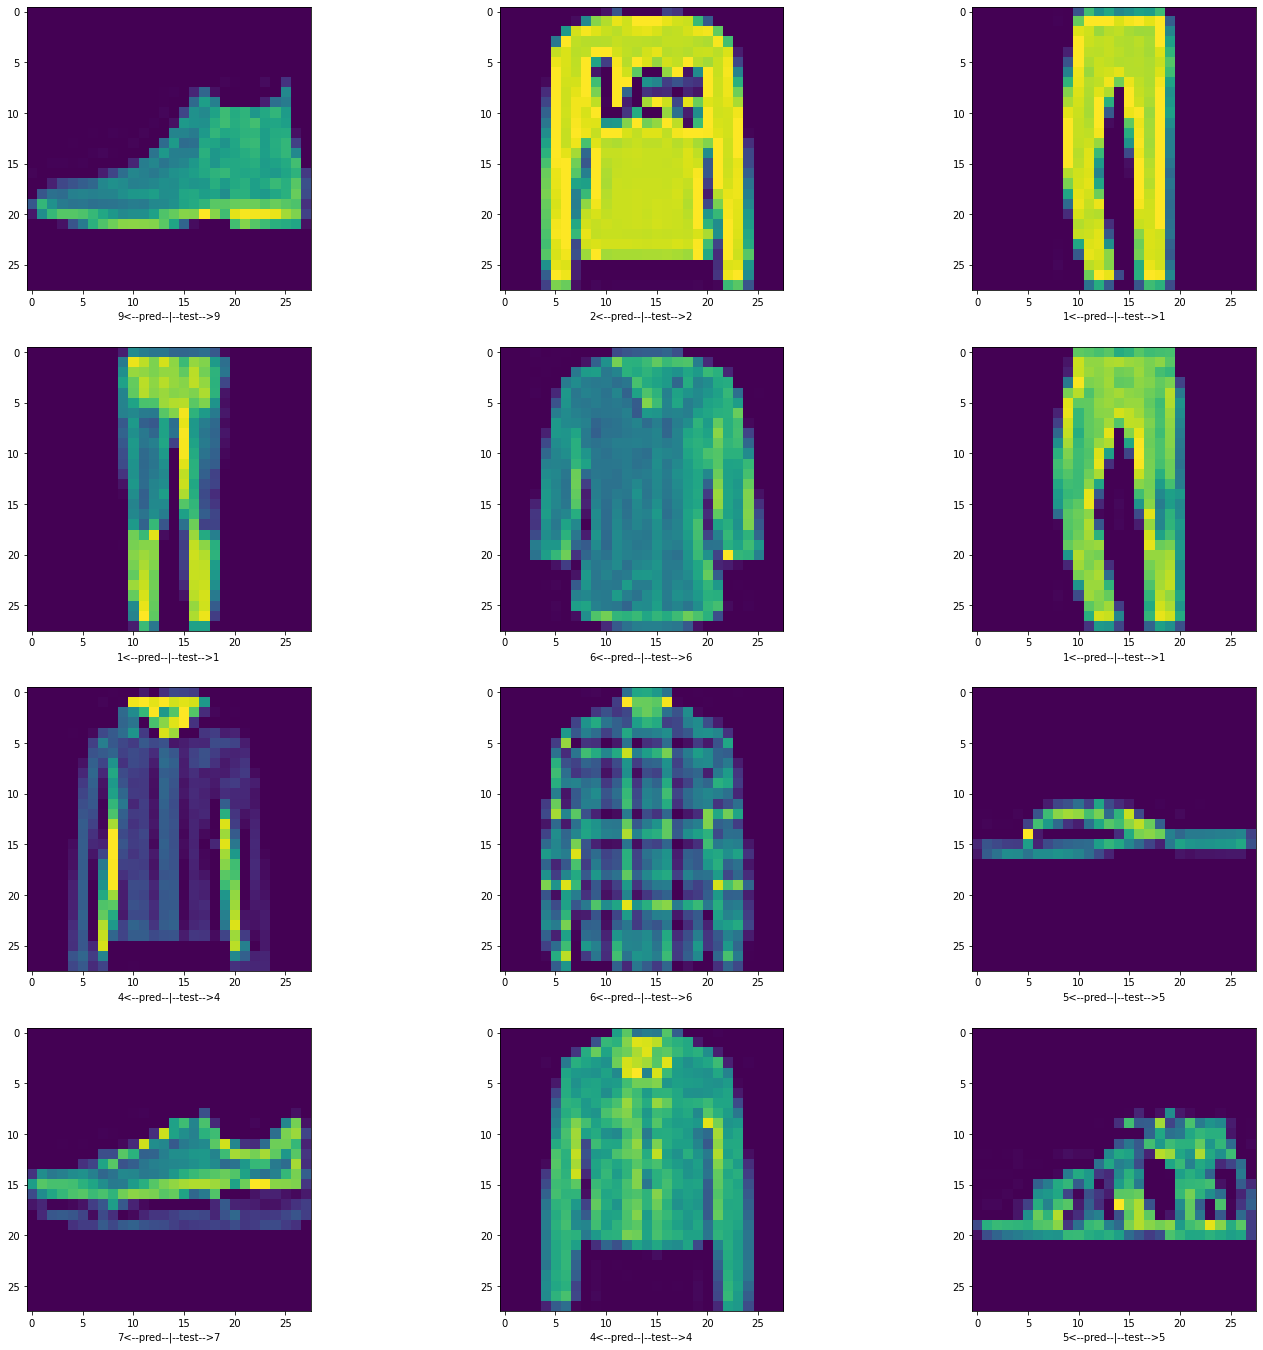

In [25]:
%%time

# Assembling the network by layers
model = Sequential(layers=[Dense(256, activation='sigmoid', input_shape=(784,)),
                           Dense(128, activation='tanh'),
                           Dense(64, activation='tanh'),
                           Dense(10, activation='softmax')],
                   name='neur_net_clo_sho')

# Compile the model using Nadam optimizer
model.compile(
    optimizer='Nadam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train model 
mf = model.fit(
    train_images,
    y_train,
    epochs=epochs,
    batch_size=1024,
    validation_split=0.25,
)
    

# Result
N = 12
y_pred=model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(2 * N,2 * N))
for i in range(N):
    plt.subplot(N //(N//4),N // 4,i + 1)
    plt.imshow(test_images[i,:].reshape(28,28))
    plt.xlabel(str(y_pred_class[i])+'<--pred--|--test-->'+str(np.argmax(y_test[i],axis=0)))
plt.show

### Выводы:
- количество слоев незначительно повышает accuracy
- лучший оптимизатор по результатам анализа - Nadam. Это Adam с импульсом Нестерова.
